In [1]:
import numpy as np
import cv2
import torch
import json
import matplotlib.pyplot as plt

# Read image and segmented area

In [2]:
#! Rectangle
image_org = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/Model_2_0070_jpeg.rf.f6b63d3d61757bb631819d5e228ffe1f.jpg")
image_seg = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_2_0070_jpeg.rf.f6b63d3d61757bb631819d5e228ffe1f.jpg")


with open("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_2_0070_jpeg.json") as f:
    data = json.load(f)

# ! Quadrilateral

# image_org = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/Model_14_0013_jpeg.rf.bab0f2a77774acd744a9c7b5b864a6b5.jpg")
# image_seg = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_14_0013_jpeg.rf.bab0f2a77774acd744a9c7b5b864a6b5.jpg")

# with open("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_14_0013_jpeg.json") as f:
#     data = json.load(f)

# ! Not Quadrilateral

# image_org = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/Model_15_0039_jpeg.rf.72bd7617b1cc96535f7b49ab20867cda.jpg")
# image_seg = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_15_0039_jpeg.rf.72bd7617b1cc96535f7b49ab20867cda.jpg")

# with open("//Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_15_0039_jpeg.json") as f:
#     data = json.load(f)

seg_output = data
class_map = {1: "other", 2: "main_beam"}

print(seg_output)


{'file_name': '/mnt/data/backup_pan/Dataset/Seg-dominik-iphone/Dominik-seg.v4i.coco-segmentation/valid/Model_2_0070_jpeg.rf.f6b63d3d61757bb631819d5e228ffe1f.jpg', 'instances': [{'class': 1, 'box': [275.2068176269531, 0.0, 562.5582275390625, 1024.0], 'score': 0.9998154044151306, 'mask': [{'polygon': [[321, 0], [319, 2], [318, 2], [312, 8], [312, 9], [311, 10], [311, 11], [310, 12], [310, 15], [309, 16], [309, 22], [308, 23], [308, 38], [307, 39], [307, 72], [306, 73], [306, 217], [305, 218], [305, 279], [304, 280], [304, 296], [303, 297], [303, 309], [302, 310], [302, 315], [301, 316], [301, 320], [300, 321], [300, 326], [299, 327], [299, 333], [298, 334], [298, 343], [297, 344], [297, 364], [296, 365], [296, 461], [295, 462], [295, 531], [294, 532], [294, 552], [293, 553], [293, 568], [292, 569], [292, 579], [291, 580], [291, 587], [290, 588], [290, 595], [289, 596], [289, 607], [288, 608], [288, 622], [287, 623], [287, 641], [286, 642], [286, 659], [285, 660], [285, 677], [284, 678], 

# Select main area

## select max area

In [3]:
#FUNCTION: Select the mask with the largest area using Shoelace formula

def polygon_area(polygon):
    polygon = np.array(polygon)
    x = polygon[:, 0]
    y = polygon[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    
max_area = 0
max_area_index = -1

for i, instance in enumerate(seg_output['instances']):
    polygons = instance['mask']
    for j, polygon_data in enumerate(polygons):
        polygon = polygon_data['polygon']
        area = polygon_area(polygon)
        print(f"Mask_{i}_{j} area: {area}")
        if area > max_area:
            max_area = area
            max_area_index = f"Mask_{i}_{j}"
            max_polygon = polygon

print(f"Largest mask index: {max_area_index}, area: {max_area}")

largest_polygon = max_polygon
print(largest_polygon)

Mask_0_0 area: 262868.5
Mask_1_0 area: 95611.0
Largest mask index: Mask_0_0, area: 262868.5
[[321, 0], [319, 2], [318, 2], [312, 8], [312, 9], [311, 10], [311, 11], [310, 12], [310, 15], [309, 16], [309, 22], [308, 23], [308, 38], [307, 39], [307, 72], [306, 73], [306, 217], [305, 218], [305, 279], [304, 280], [304, 296], [303, 297], [303, 309], [302, 310], [302, 315], [301, 316], [301, 320], [300, 321], [300, 326], [299, 327], [299, 333], [298, 334], [298, 343], [297, 344], [297, 364], [296, 365], [296, 461], [295, 462], [295, 531], [294, 532], [294, 552], [293, 553], [293, 568], [292, 569], [292, 579], [291, 580], [291, 587], [290, 588], [290, 595], [289, 596], [289, 607], [288, 608], [288, 622], [287, 623], [287, 641], [286, 642], [286, 659], [285, 660], [285, 677], [284, 678], [284, 688], [283, 689], [283, 697], [282, 698], [282, 705], [281, 706], [281, 711], [280, 712], [280, 718], [279, 719], [279, 726], [278, 727], [278, 737], [277, 738], [277, 754], [276, 755], [276, 809], [275

## Plot original polygon

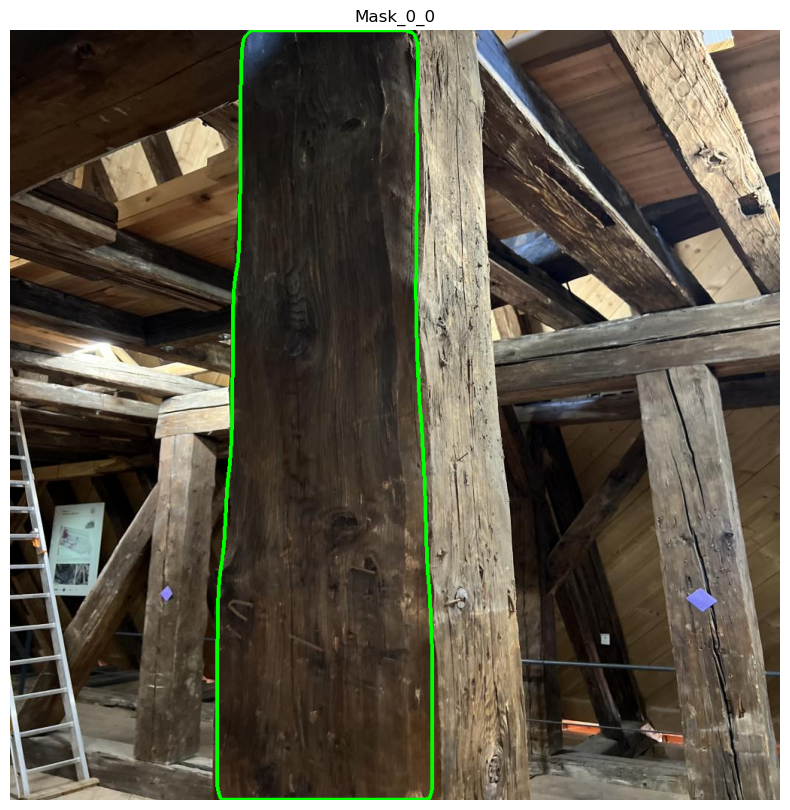

In [4]:
def draw_polygon_on_image(image, polygon):
    pts = np.array(polygon, np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=3)
    return image

image_with_polygon = draw_polygon_on_image(image_org.copy(), largest_polygon)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_polygon, cv2.COLOR_BGR2RGB))
plt.title(max_area_index)
plt.axis('off')
plt.show()

# plt.imsave("image_with_largest_polygon.jpg", cv2.cvtColor(image_with_polygon, cv2.COLOR_BGR2RGB))


# Abstract complex polygon from the main area to simple polygon

In [5]:
def draw_simple_polygon(image, simplified_polygon):
    pts = np.array(simplified_polygon, np.int32)
    if pts.shape[-1] == 1:
        pts = pts.reshape((-1, 2))
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(255, 0, 0), thickness=3) 
    return image

## Simplify polygon using **Douglas-Peucker**

Simplified polygon using Douglas-Peucker algorithm:
[[[ 321    0]]

 [[ 276 1011]]

 [[ 557 1022]]

 [[ 541   15]]]


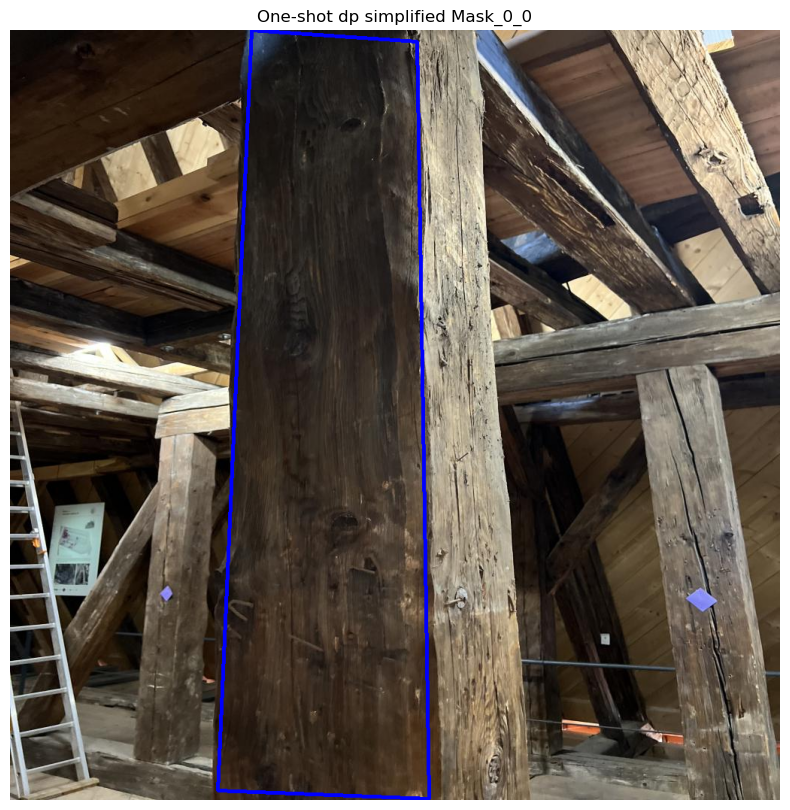

In [6]:
# FUNCTION: Simplify the polygon using Douglas-Peucker algorithm

def dp_simplify(polygon, epsilon_factor=0.006):
    contour = np.array(polygon, dtype=np.int32).reshape((-1, 1, 2))
    epsilon = epsilon_factor * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return approx

dp_simplified_polygon = dp_simplify(largest_polygon)

print("Simplified polygon using Douglas-Peucker algorithm:")
print(dp_simplified_polygon)

image_with_dp_polygon = draw_simple_polygon(image_org.copy(), dp_simplified_polygon)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_dp_polygon, cv2.COLOR_BGR2RGB))
plt.title(f"One-shot dp simplified {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_with_dp_polygon.jpg", cv2.cvtColor(image_with_dp_polygon, cv2.COLOR_BGR2RGB))



## Simplify polygon using **Visvalingam–Whyatt**

Simplified polygon using Visvalingam–Whyatt algorithm:
[[3.210e+02 0.000e+00]
 [3.190e+02 2.000e+00]
 [3.180e+02 2.000e+00]
 [3.120e+02 8.000e+00]
 [3.120e+02 9.000e+00]
 [3.110e+02 1.000e+01]
 [3.110e+02 1.100e+01]
 [3.100e+02 1.200e+01]
 [3.100e+02 1.500e+01]
 [3.090e+02 1.600e+01]
 [3.090e+02 2.200e+01]
 [3.080e+02 2.300e+01]
 [3.080e+02 3.800e+01]
 [3.070e+02 3.900e+01]
 [3.070e+02 7.200e+01]
 [3.060e+02 7.300e+01]
 [3.060e+02 2.170e+02]
 [3.050e+02 2.180e+02]
 [3.050e+02 2.790e+02]
 [3.040e+02 2.800e+02]
 [3.040e+02 2.960e+02]
 [3.030e+02 2.970e+02]
 [3.030e+02 3.090e+02]
 [3.020e+02 3.100e+02]
 [3.020e+02 3.150e+02]
 [3.010e+02 3.160e+02]
 [3.010e+02 3.200e+02]
 [3.000e+02 3.210e+02]
 [3.000e+02 3.260e+02]
 [2.990e+02 3.270e+02]
 [2.990e+02 3.330e+02]
 [2.980e+02 3.340e+02]
 [2.980e+02 3.430e+02]
 [2.970e+02 3.440e+02]
 [2.970e+02 3.640e+02]
 [2.960e+02 3.650e+02]
 [2.960e+02 4.610e+02]
 [2.950e+02 4.620e+02]
 [2.950e+02 5.310e+02]
 [2.940e+02 5.320e+02]
 [2.940e+02 5.520e+02]
 [

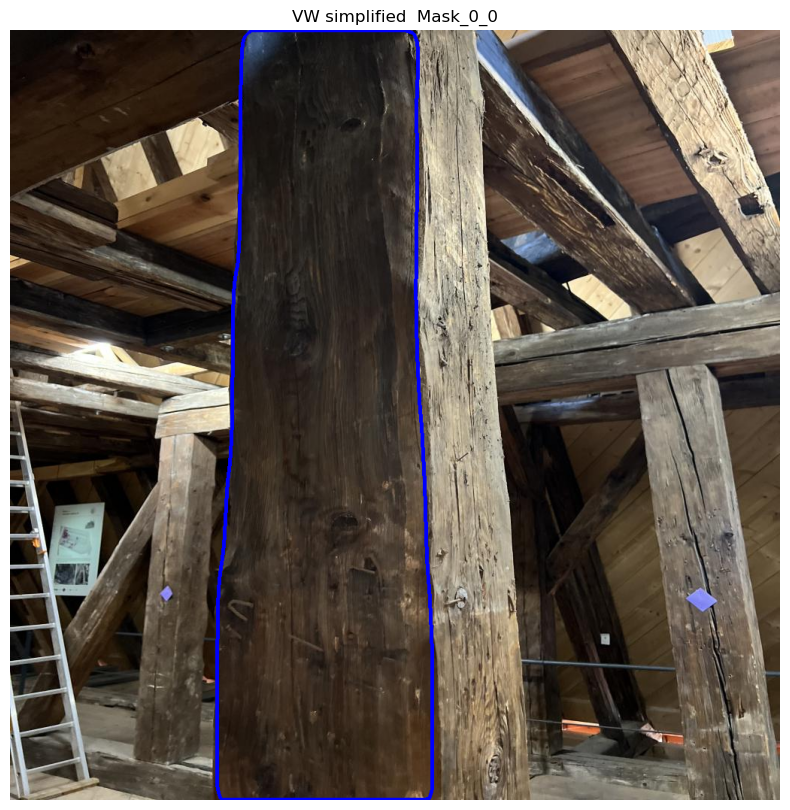

In [7]:
# FUNCTION: Simplified polygon using Visvalingam–Whyatt algorithm

def vw_simplify(polygon, threshold=0.5):
    def area_of_triangle(p1, p2, p3):
        return 0.5 * abs(p1[0] * (p2[1] - p3[1]) + p2[0] * (p3[1] - p1[1]) + p3[0] * (p1[1] - p2[1]))
    
    points = np.array(polygon, dtype=np.float32)
    is_removed = np.zeros(points.shape[0], dtype=bool)
    areas = np.array([area_of_triangle(points[i - 1], points[i], points[i + 1]) for i in range(1, len(points) - 1)])
    
    while len(areas) > 0 and np.min(areas) < threshold:
        min_index = np.argmin(areas) + 1
        is_removed[min_index] = True
        points = points[~is_removed]
        print(f"Removed point at index {min_index}, remaining points: {len(points)}")
        if len(points) < 3:
            break
        areas = np.array([area_of_triangle(points[i - 1], points[i], points[i + 1]) for i in range(1, len(points) - 1)])
        print(f"Recomputed areas: {areas}")
    return points

vw_simplified_polygon = vw_simplify(largest_polygon)

print("Simplified polygon using Visvalingam–Whyatt algorithm:")
print(vw_simplified_polygon)

image_with_vw_polygon = draw_simple_polygon(image_org.copy(), vw_simplified_polygon)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_vw_polygon, cv2.COLOR_BGR2RGB))
plt.title(f"VW simplified  {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_with_vw_polygon.jpg", cv2.cvtColor(image_with_vw_polygon, cv2.COLOR_BGR2RGB))


### Plot simplify polygon

## Simplify polygon using **convex_hull**

[[[ 526    0]]

 [[ 535    3]]

 [[ 537    5]]

 [[ 539    9]]

 [[ 541   15]]

 [[ 542   22]]

 [[ 561  816]]

 [[ 561 1010]]

 [[ 560 1014]]

 [[ 558 1020]]

 [[ 557 1022]]

 [[ 552 1023]]

 [[ 282 1023]]

 [[ 280 1022]]

 [[ 279 1021]]

 [[ 277 1015]]

 [[ 276 1011]]

 [[ 275 1006]]

 [[ 275  810]]

 [[ 276  755]]

 [[ 307   39]]

 [[ 308   23]]

 [[ 309   16]]

 [[ 310   12]]

 [[ 312    8]]

 [[ 318    2]]

 [[ 321    0]]]


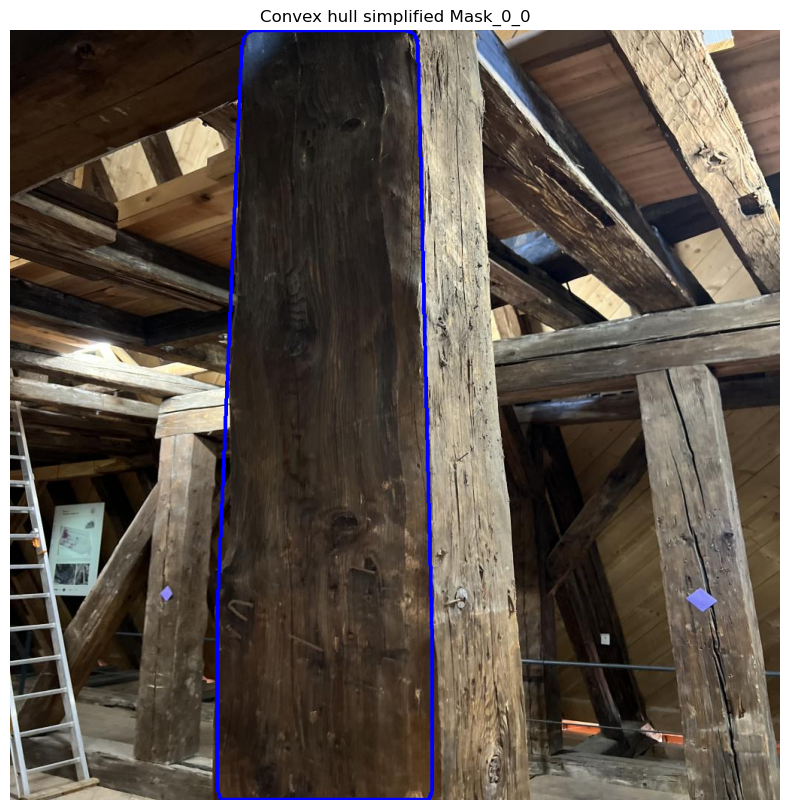

In [8]:
#FUNCTION: convex_hull

def ch_simplify(polygon):
    points = np.array(polygon, dtype=np.int32).reshape((-1, 1, 2))
    hull = cv2.convexHull(points)
    return hull

# simplified_polygon = ch_simplify(dp_simplified_polygon)
simplified_polygon = ch_simplify(vw_simplified_polygon)

print(simplified_polygon)

image_after_ch = draw_simple_polygon(image_org.copy(), simplified_polygon)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_after_ch, cv2.COLOR_BGR2RGB))
plt.title(f"Convex hull simplified {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_after_ch.jpg", cv2.cvtColor(image_after_ch, cv2.COLOR_BGR2RGB))



# Reshape the simple polygon to parallel pairs/correct perspective

## Find the outer quadrilateral of the polygon using Douglas-Peucker


Best outer quadrilateral: [[[ 526    0]]

 [[ 561 1010]]

 [[ 282 1023]]

 [[ 309   16]]]


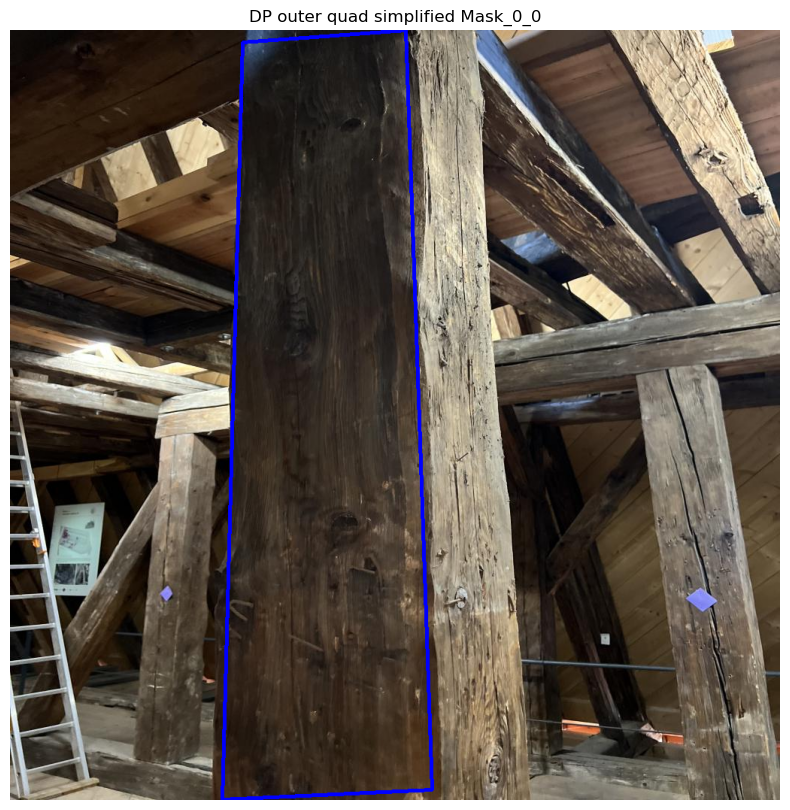

In [9]:
optimal_quad_pts = dp_simplify(simplified_polygon, epsilon_factor=0.03)

print("Best outer quadrilateral:", optimal_quad_pts)

optimal_quad_pts = ch_simplify(optimal_quad_pts)

image_outer_quad = draw_simple_polygon(image_org.copy(), optimal_quad_pts)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_outer_quad, cv2.COLOR_BGR2RGB))
plt.title(f"DP outer quad simplified {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_after_ch.jpg", cv2.cvtColor(image_after_ch, cv2.COLOR_BGR2RGB))

# Perspective correction

## centroid

centroid:  (419.71902923125714, 533.2435782640326)
rect:  [[ 304.61624   65.7901 ]
 [ 534.82184   65.7901 ]
 [ 534.82184 1000.6971 ]
 [ 304.61624 1000.6971 ]]


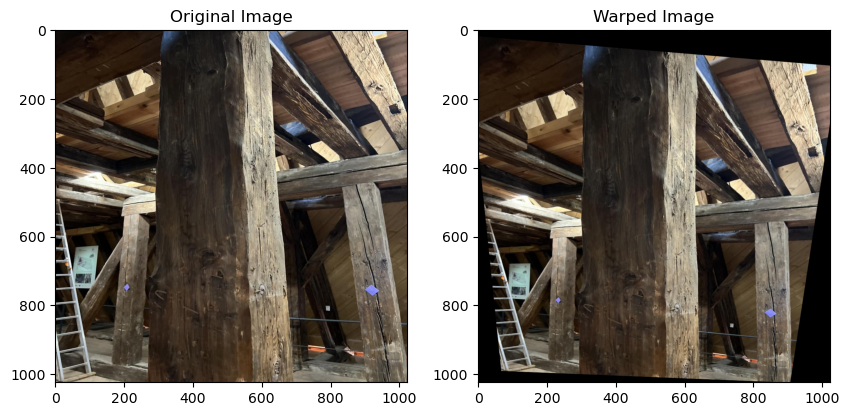

In [10]:
def preprocess_vertices(vertices):
    points = [(v[0][0], v[0][1]) for v in vertices]

    center = np.mean(points, axis=0)
    sorted_points = sorted(points, key=lambda p: (np.arctan2(p[1] - center[1], p[0] - center[0])))
    # print(sorted_points)
    return sorted_points

def polygon_centroid(vertices):
    n = len(vertices)
    if n < 3:
        raise ValueError("A polygon must have at least three vertices")
    
    A = 0
    for i in range(n):
        x0, y0 = vertices[i]
        x1, y1 = vertices[(i + 1) % n]
        A += x0 * y1 - x1 * y0
    A /= 2
    
    Cx = 0
    Cy = 0
    for i in range(n):
        x0, y0 = vertices[i]
        x1, y1 = vertices[(i + 1) % n]
        common_factor = (x0 * y1 - x1 * y0)
        Cx += (x0 + x1) * common_factor
        Cy += (y0 + y1) * common_factor
    Cx /= (6 * A)
    Cy /= (6 * A)
    
    return Cx, Cy

def distance(pt1, pt2):
    return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

def get_vertices_from_quad(vertices, centroid, image_shape):
    dists = [
        distance(vertices[0], vertices[1]),
        distance(vertices[1], vertices[2]),
        distance(vertices[2], vertices[3]),
        distance(vertices[3], vertices[0])
    ]

    avg_length = [dists[0] + dists[2], dists[1] + dists[3]]

    rect = np.array([
        [centroid[0] - avg_length[0] / 2, centroid[1] - avg_length[1] / 2],
        [centroid[0] + avg_length[0] / 2, centroid[1] - avg_length[1] / 2],
        [centroid[0] + avg_length[0] / 2, centroid[1] + avg_length[1] / 2],
        [centroid[0] - avg_length[0] / 2, centroid[1] + avg_length[1] / 2]
    ], dtype="float32")
    
        # Adjust rect to fit within image bounds
    width, height = image_shape[1], image_shape[0]
    scale_factor = 1.0
    while True:
        min_x = np.min(rect[:, 0])
        min_y = np.min(rect[:, 1])
        max_x = np.max(rect[:, 0])
        max_y = np.max(rect[:, 1])
        
        if min_x >= 0 and min_y >= 0 and max_x < width and max_y < height:
            break
        
        scale_factor *= 0.95
        rect = np.array([
            [centroid[0] - (avg_length[0] / 2) * scale_factor, centroid[1] - (avg_length[1] / 2) * scale_factor],
            [centroid[0] + (avg_length[0] / 2) * scale_factor, centroid[1] - (avg_length[1] / 2) * scale_factor],
            [centroid[0] + (avg_length[0] / 2) * scale_factor, centroid[1] + (avg_length[1] / 2) * scale_factor],
            [centroid[0] - (avg_length[0] / 2) * scale_factor, centroid[1] + (avg_length[1] / 2) * scale_factor]
        ], dtype="float32")
    
    return rect


vertices = preprocess_vertices(optimal_quad_pts)

centroid = polygon_centroid(vertices)
print(f'centroid: ', centroid)

rect = get_vertices_from_quad(vertices, centroid, image_shape=image_org.shape)
print(f'rect: ',rect)

M = cv2.getPerspectiveTransform(np.array(vertices, dtype="float32"), rect)

output_size = (image_org.shape[1], image_org.shape[0])
warped = cv2.warpPerspective(image_org, M, output_size)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Warped Image')
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.show()

## intersection of diagonals

In [11]:
def calculate_intersection(vertices):
    """
    Calculate the intersection of the diagonals of a quadrilateral.
    
    :param vertices: List of tuples representing the vertices of the quadrilateral [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
    :return: Tuple representing the intersection point (X, Y)
    """
    (x1, y1), (x2, y2), (x3, y3), (x4, y4) = vertices
    
    denominator = (x1 - x3) * (y2 - y4) - (y1 - y3) * (x2 - x4)
    if denominator == 0:
        raise ValueError("The diagonals do not intersect (denominator is zero).")
    
    X = ((x1 * y3 - y1 * x3) * (x2 - x4) - (x1 - x3) * (x2 * y4 - y2 * x4)) / denominator
    Y = ((x1 * y3 - y1 * x3) * (y2 - y4) - (y1 - y3) * (x2 * y4 - y2 * x4)) / denominator
    
    return X, Y

quad_inter = [(v[0][0], v[0][1]) for v in optimal_quad_pts]
intersection = calculate_in                                     tersection(quad_inter)
print(f"The intersection of the diagonals is at: {intersection}")


SyntaxError: invalid syntax (127472768.py, line 20)